# Exploratory Data Analysis on Haberman Dataset

### 1. INTRODUCTION TO HABERMAN DATASET

#### Basic information about haberman dataset:
##### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### 2. Importing libraries and loading the file.

In [15]:
# importing OS
import os
#importing pandas package
import pandas as pd
#importing numpy package
import numpy as np
#importing matplotlib.pyplot
import matplotlib.pyplot as plt
#importing seaborn 
import seaborn as sns
#assigning the haberman.csv file to cancer data frame
cancer=pd.read_csv('/Users/lazyhacker/submiss/edaonhaberdata..assignment 4/haberman.csv')
print(cancer.head())
print('the number of elements in the data set is: {}'.format(cancer.size))
print("The number of patients data : {}".format(len(cancer)))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
the number of elements in the data set is: 1224
The number of patients data : 306


### 3.Getting basic info about data.
##### *The data set contains the details about AGE , YEAR , NODES, STATUS of patients.
##### *there are total of 1224 elements in the data set and there are 306 patients details.

In [16]:
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


##### #There are no missing values in the dataset.
##### #All the data is of int type.
##### #The status has type 1 and  2, 1 for yes and 2 for no. 

In [17]:
cancer['status']=cancer['status'].map({1:'Yes',2:'No'})
print(cancer.head())

   age  year  nodes status
0   30    64      1    Yes
1   30    62      3    Yes
2   30    65      0    Yes
3   31    59      2    Yes
4   31    65      4    Yes


In [12]:
cancer.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


###  Over all information about data set
#### total number of rows = 306
#### mean = mean of all data in that coloumn
#### std = standard deviation in that coloumn
#### 25%, 50%, 75% are percentiles of 25th , 50th , 75th respectively.

In [18]:
cancer['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

#### value_counts function gives data about how many data points are present for each class.
#### There are 225 surived and 81 died out of 306 people.
#### The data set is inbalance.

In [19]:
survied=cancer[cancer['status']=='Yes']
non_survied=cancer[cancer['status']=="No"]
print(survied.describe())
print('\n')
print(non_survied.describe())

              age        year       nodes
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000


             age       year      nodes
count  81.000000  81.000000  81.000000
mean   53.679012  62.827160   7.456790
std    10.167137   3.342118   9.185654
min    34.000000  58.000000   0.000000
25%    46.000000  59.000000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.000000
max    83.000000  69.000000  52.000000


#### In both the data of survied and non survied patients the mean is nearly same but nodes are different.
#### The patients with nodes less than 2 have better chance of surviving.

### 4.univeriate analysis
##### To summarize and to find patterns in single feature.
####  a.PDF (probabilty density function) 

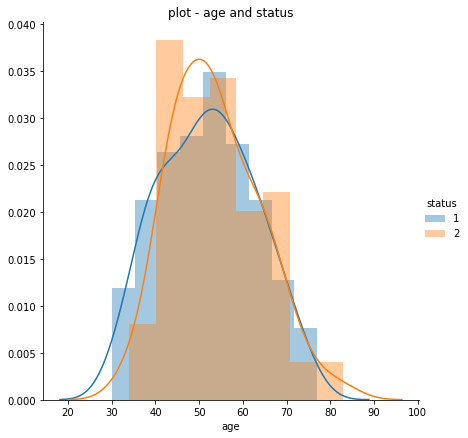

In [4]:
sns.FacetGrid(cancer,hue='status',height=6).map(sns.distplot,'age').add_legend()
plt.title('plot - age and status')
plt.show()

### observations
#### 1. There are major overlapping between the age and changes of living.
#### 2. people age in range of 30-35 have more chance of surviving

Text(0.5, 1.0, 'plot - year and status')

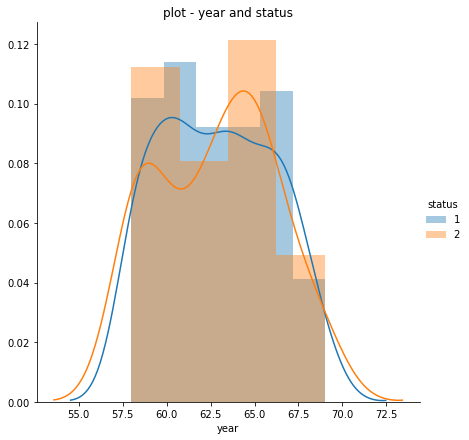

In [6]:
sns.FacetGrid(cancer,hue='status',height=6).map(sns.distplot,'year').add_legend()
plt.title('plot - year and status')

### observations
#### 1. In year n=between 60 to 65 there is a better chance of survival
#### 2.max of the data is overlapped so can able to justify simply.

Text(0.5, 1.0, 'plot- status and nodes')

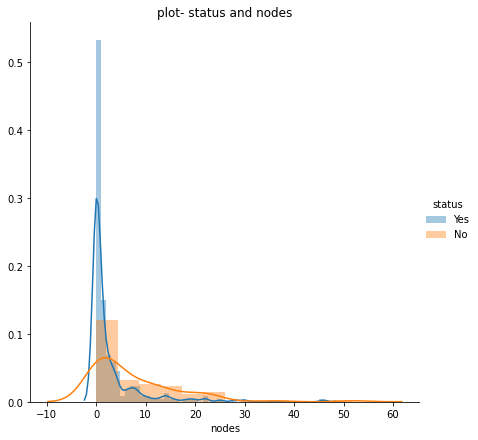

In [20]:
sns.FacetGrid(cancer,hue='status',height=6).map(sns.distplot,'nodes').add_legend()
plt.title('plot- status and nodes')

### observations
#### people with nodes from 0-5 has better chance of suvival.
#### people with nodes above 10 has less chance of survival.
#### number of nodes gives better understaing of surival.

### b.CDF(cummulative distrubution function)
### cdf is a prbability that takes a value less than or equal to x

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


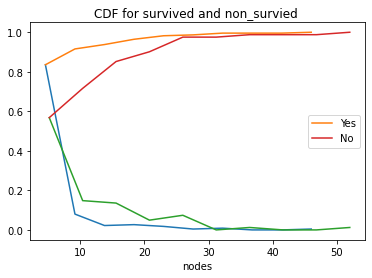

In [22]:
counts1, bin_count1 = np.histogram(survied['nodes'],bins=10,density=True)
pdf1=counts1/sum(counts1)
print(pdf1)
print(bin_count1)
cdf1=np.cumsum(pdf1)
plt.plot(bin_count1[1:],pdf1)
plt.plot(bin_count1[1:],cdf1,label='Yes')
plt.xlabel('nodes')

print('\n')
counts2, bin_count2 = np.histogram(non_survied['nodes'],bins=10,density=True)
pdf2=counts2/sum(counts2)
print(bin_count2)
cdf2=np.cumsum(pdf2)
plt.plot(bin_count2[1:],pdf2)
plt.plot(bin_count2[1:],cdf2,label='No')
plt.xlabel('nodes')
plt.title('CDF for survived and non_survied ')
plt.legend()
plt.show()


### c.Box plot and violin plots

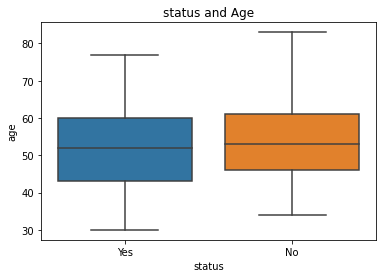

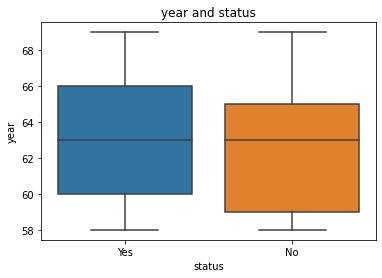

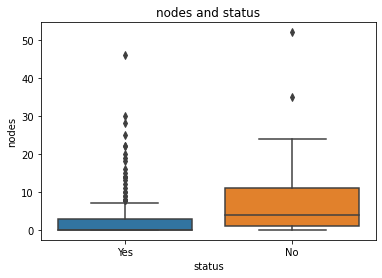

In [23]:
sns.boxplot(x='status',y='age',data=cancer)
plt.title('status and Age')
plt.show()
sns.boxplot(x='status',y='year',data=cancer)
plt.title('year and status')
plt.show()
sns.boxplot(x='status',y='nodes',data=cancer)
plt.title('nodes and status')
plt.show()

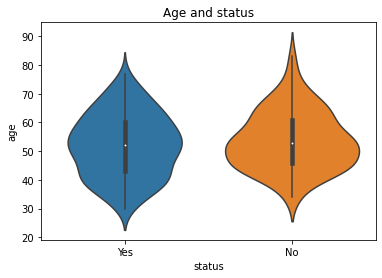

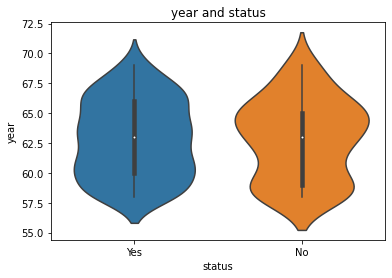

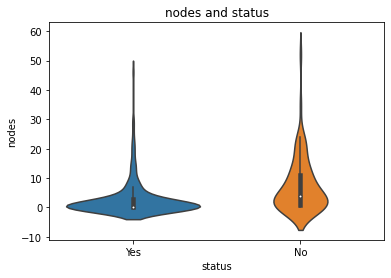

In [24]:
sns.violinplot(x='status',y='age',data = cancer,height = 10)
plt.title('Age and status')
plt.show()
sns.violinplot(x='status',y='year',data = cancer,height = 10)
plt.title('year and status')
plt.show()
sns.violinplot(x='status',y='nodes',data = cancer,height = 10)
plt.title('nodes and status')
plt.show()

### obervations:
####   people age between 40 to 50 has less chance of survival
####   In year range of 1965 more number of treatment was performed but the change of survival is very low.
####   people who has nodes above one has low chance of survival.

## 5.Biveriate analysis
### a. scatter plot
#### scatter plot is used to visualize 2 dimensional data.

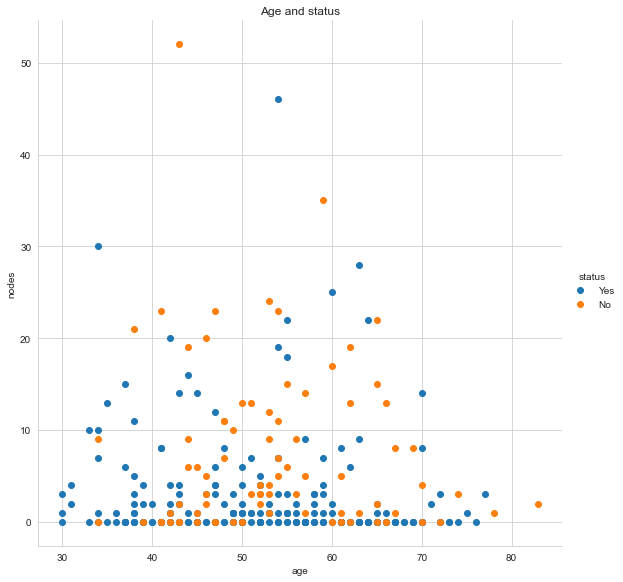

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer, hue='status',height=8).map(plt.scatter,'age','nodes').add_legend()
plt.title('Age and status')
plt.show()

### observations:
#### people with 0 nodes are have higher chance of survival
#### people above 10 nodes are less exist
#### people with age around 50 to 70 have higher rate of survival even we have more than 10 nodes.

###  3. pair plot
####  used to analyse data of higher dimensions 2-3,4.

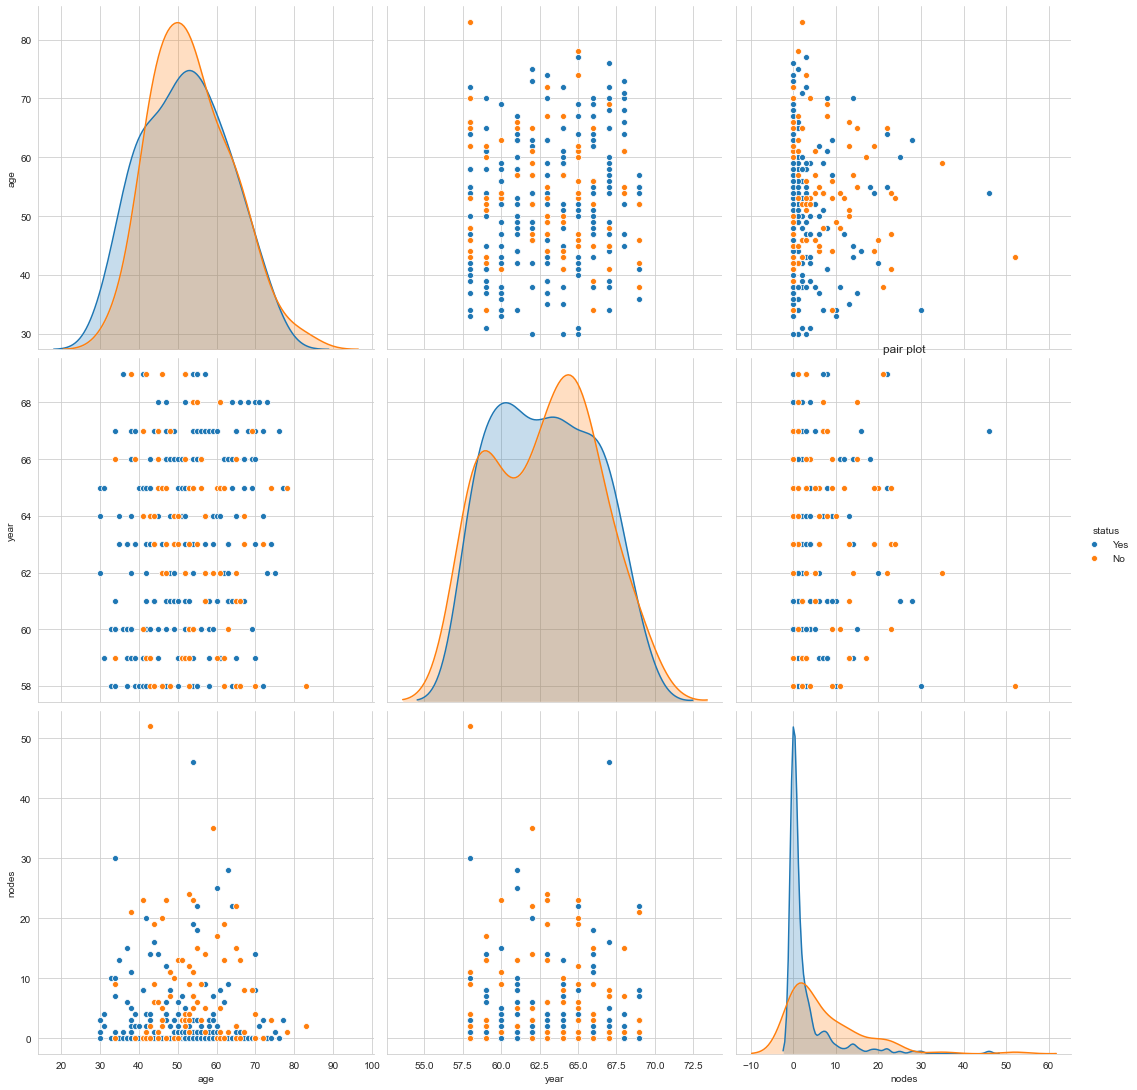

In [26]:
sns.set_style('whitegrid')
sns.pairplot(cancer,hue='status',height=5)
plt.title('pair plot')
plt.show()

### observations:
####  the plot between nodes and year have better visualization.

### 4.multivariate analysis
#### a. counter plot
##### have better visualisation of 3d data.

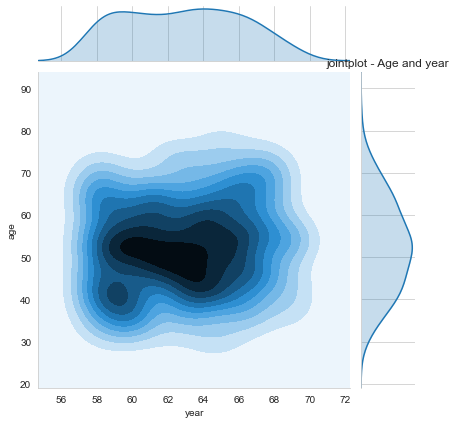

In [28]:
sns.jointplot(x = 'year', y = 'age', data = cancer, kind = 'kde')
plt.title('jointplot - Age and year')
plt.show()

### observations:
#### From 1960 to 1964, more number of treatement done on the patients in the age group 45 to 55

## conclusion:
#### **people have below 35 years have more chance of survival.
#### **number of nodes is inversely propotional to survival chances.